In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Select features and target
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].copy()
df.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
539,1,female,22.0,0,2,49.5000,C,1
13,3,male,39.0,1,5,31.2750,S,0
630,1,male,80.0,0,0,30.0000,S,1
120,2,male,21.0,2,0,73.5000,S,0
509,3,male,26.0,0,0,56.4958,S,1
724,1,male,27.0,1,0,53.1000,S,1
748,1,male,19.0,1,0,53.1000,S,0
774,2,female,54.0,1,3,23.0000,S,1
590,3,male,35.0,0,0,7.1250,S,0
352,3,male,15.0,1,1,7.2292,C,0


In [5]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [6]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male:1, female:0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

In [8]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [9]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [10]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [11]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
from sklearn.feature_selection import mutual_info_classif

# Compute Information Gain (mutual information)
info_gain = mutual_info_classif(X, y, discrete_features='auto')

# Create DataFrame of IG scores
ig_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
ig_df.sort_values(by='Information Gain', ascending=False, inplace=True)
ig_df

,Feature,Information Gain
1,Sex,0.141789
5,Fare,0.141605
0,Pclass,0.043426
3,SibSp,0.038473
6,Embarked,0.026086
2,Age,0.009568
4,Parch,0.000000


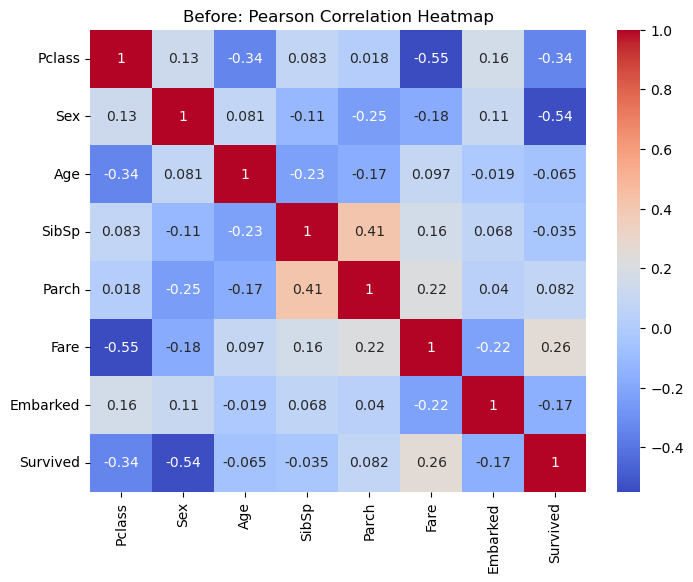

In [13]:
# Before selection
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Before: Pearson Correlation Heatmap")
plt.show()

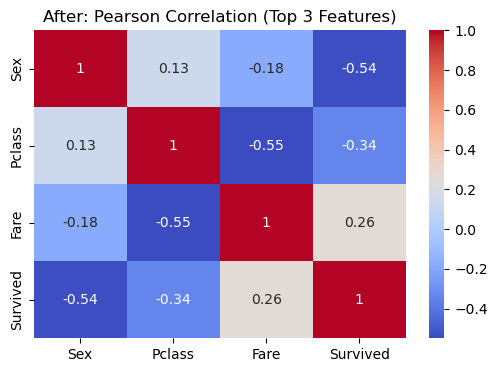

In [14]:
# Select features with strong correlation to 'survived'
corr_matrix = df.corr()
strong_corr = corr_matrix['Survived'].abs().sort_values(ascending=False)
selected = strong_corr[1:4].index.tolist()  # top 3 features excluding target

# After selection
plt.figure(figsize=(6,4))
sns.heatmap(df[selected + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.title("After: Pearson Correlation (Top 3 Features)")
plt.show()

In [15]:
strong_corr

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257307
Embarked    0.167675
Parch       0.081629
Age         0.064910
SibSp       0.035322
Name: Survived, dtype: float64

In [16]:
from sklearn.preprocessing import  MinMaxScaler

## Normalize Features (Chi2 requires non-negative values)

In [17]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [18]:
X_scaled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
888,1.0,0.0,0.346569,0.125,0.333333,0.045771,1.0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


## Apply Chi-Square Test

In [19]:
from sklearn.feature_selection import chi2

chi_vals, p_vals = chi2(X_scaled, y)

# Store results
chi_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_vals,
    'p-value': p_vals
}).sort_values(by='Chi2 Score', ascending=False)

print(chi_df)

    Feature  Chi2 Score       p-value
1       Sex   92.702447  6.077838e-22
0    Pclass   27.232933  1.803602e-07
5      Fare    8.819172  2.980820e-03
6  Embarked    5.101262  2.390844e-02
4     Parch    1.682917  1.945374e-01
3     SibSp    0.322733  5.699697e-01
2       Age    0.275991  5.993412e-01


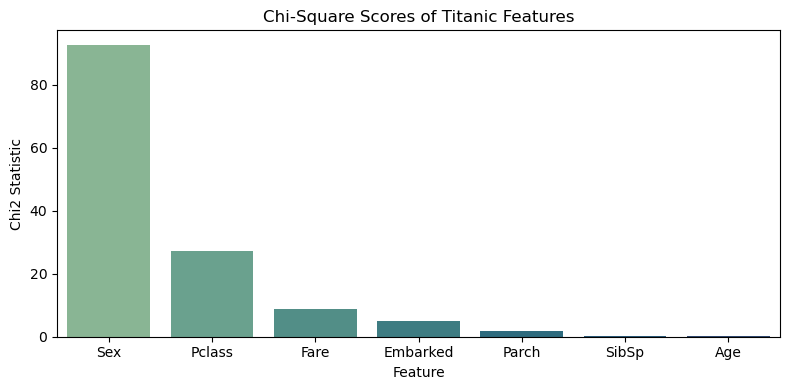

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x='Feature', y='Chi2 Score', data=chi_df, palette='crest')
plt.title("Chi-Square Scores of Titanic Features")
plt.ylabel("Chi2 Statistic")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

## ANOVA TEST

In [21]:
from scipy.stats import f_oneway

# Drop missing values in relevant columns
df = df[['Pclass', 'Fare']].dropna()

# Separate fares by Pclass
fare_class1 = df[df['Pclass'] == 1]['Fare']
fare_class2 = df[df['Pclass'] == 2]['Fare']
fare_class3 = df[df['Pclass'] == 3]['Fare']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(fare_class1, fare_class2, fare_class3)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 242.34415651744814
p-value: 1.0313763209141171e-84


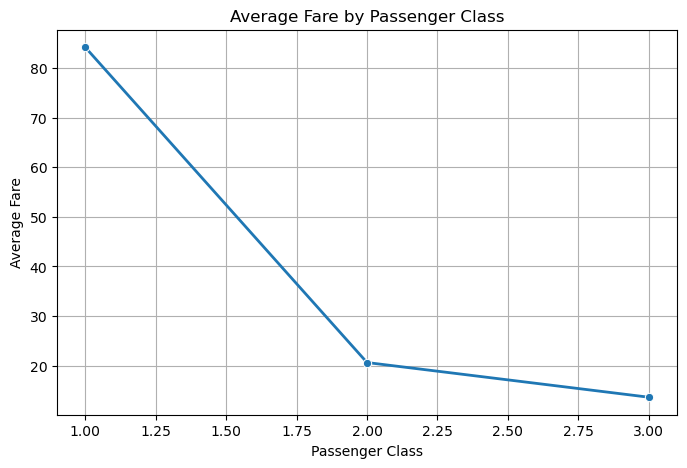

In [22]:
# Group by 'pclass' and calculate mean fare
mean_fare = df.groupby('Pclass')['Fare'].mean().reset_index()

# Line plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=mean_fare, x='Pclass', y='Fare', marker='o', linewidth=2)
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()

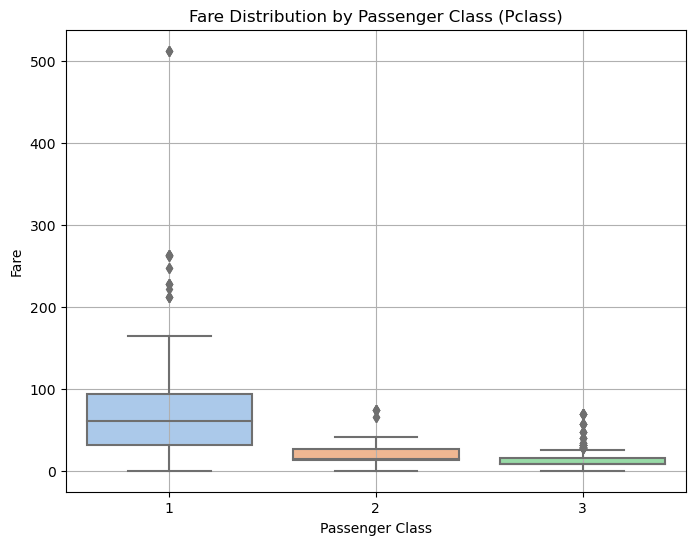

In [23]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')
plt.title('Fare Distribution by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

## Variance threshold

In [28]:
df = pd.read_csv('Dataset/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
from sklearn.feature_selection import VarianceThreshold

# Select numeric features only
num_df = df.select_dtypes(include=['int64', 'float64']).dropna()

# Print original features
print("Original Features:", num_df.columns.tolist())

# Apply Variance Threshold
selector = VarianceThreshold(threshold=1.0)  # remove features with variance ≤ 1
reduced_data = selector.fit_transform(num_df)

# Get selected feature names
selected_features = num_df.columns[selector.get_support()]

print("Selected Features after Variance Threshold:", selected_features.tolist())

Original Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Selected Features after Variance Threshold: ['PassengerId', 'Age', 'Fare']


## Wrapper method

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use logistic regression
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X, y)

# Print selected features
print("Selected features (RFE):", X.columns[fit.support_].tolist())

Selected features (RFE): ['Pclass', 'Sex']


## Forward selection

In [31]:
import statsmodels.api as sm

def forward_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []
    while remaining_features:
        scores = []
        for feature in remaining_features:
            features_to_test = initial_features + [feature]
            X_model = sm.add_constant(X[features_to_test])
            model = sm.Logit(y, X_model).fit(disp=0)
            scores.append((model.aic, feature))
        scores.sort()
        best_aic, best_feature = scores[0]
        initial_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_features.append(best_feature)
    return best_features

selected_forward = forward_selection(X, y)
print("Selected features (Forward Selection):", selected_forward)

Selected features (Forward Selection): ['Sex', 'Pclass', 'Age', 'SibSp', 'Embarked', 'Fare', 'Parch']


## backward elimination

In [32]:
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_model = sm.add_constant(X[features])
        model = sm.Logit(y, X_model).fit(disp=0)
        p_values = model.pvalues.iloc[1:]
        worst_feature = p_values.idxmax()
        worst_pval = p_values.max()
        if worst_pval > significance_level:
            features.remove(worst_feature)
        else:
            break
    return features

selected_backward = backward_elimination(X, y)
print("Selected features (Backward Elimination):", selected_backward)


Selected features (Backward Elimination): ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']
